Now that I have cleaned and prepared data, I'll answer some `inferential` questions and visualize them:

* What are the most sought-after skills for data-analyst positions?
* Which **companies** are hiring the most data-analysts?
* How do salary outcomes differ between remote-work & non-remote work?

In [332]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

encoded_df = pd.read_csv('data/encoded_df.csv')

encoded_df['salary_standardized']

0        45760.0
1       120000.0
2        53040.0
3        52000.0
4        91960.0
          ...   
2223     62400.0
2224     63440.0
2225     26000.0
2226     63440.0
2227    122720.0
Name: salary_standardized, Length: 2228, dtype: float64

All Data Analyst Full Standardized Salaries
1. Histogram
2. Kolmolgorov-Smirnov test for normality
3. Boxplot

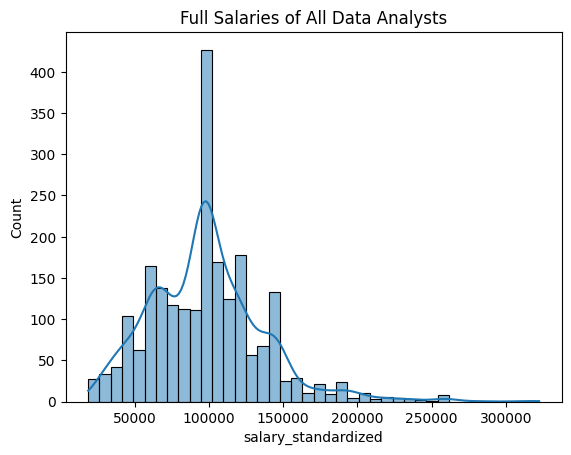

In [333]:
# All data analyst salaries

sns.histplot(data = encoded_df, x = 'salary_standardized', kde = True).set(title = 'Full Salaries of All Data Analysts')

plt.savefig("images/full_salary_hist.jpg")

In [334]:
# kstest for all data analysts

from scipy import stats

stats.kstest(
    encoded_df['salary_standardized'], cdf = stats.norm.cdf, 
args = (encoded_df["salary_standardized"].mean(), 
encoded_df["salary_standardized"].std()))

KstestResult(statistic=0.08846265470616899, pvalue=1.2767836585040726e-15, statistic_location=104004.6, statistic_sign=1)

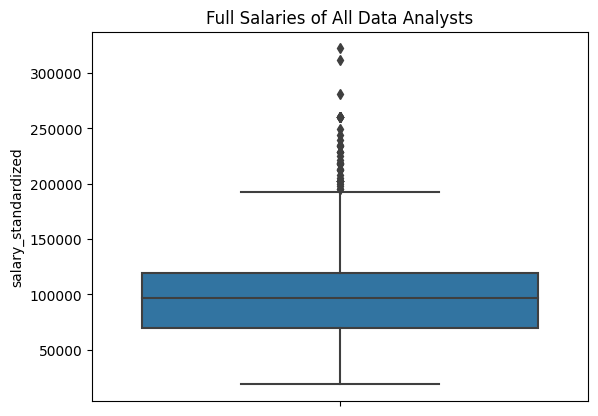

In [335]:
# Boxplot for Full Salaries of All Data Analysts

sns.boxplot(y = encoded_df['salary_standardized']).set_title('Full Salaries of All Data Analysts')

plt.savefig("images/full_salary_all_analysts_box.jpg")

Remote Data Analyst Full Standardized Salaries
1. Histogram
2. Kolmogorov-Smirnov test for normality
3. Boxplot

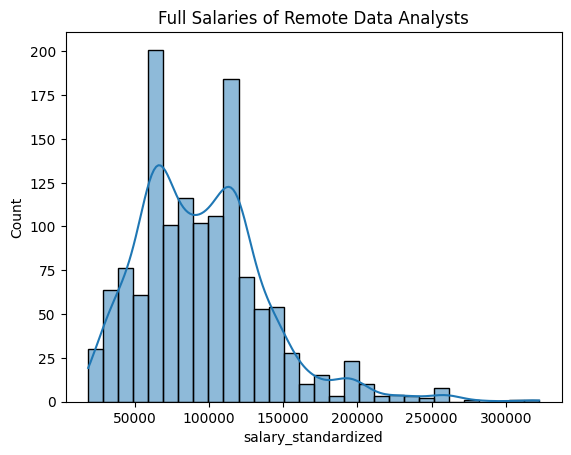

In [336]:
# A new variable can be set to find remote workers data

remote = encoded_df[encoded_df["work_from_home"] == True] 

sns.histplot(data = remote, x = 'salary_standardized', 
kde = True).set(title = 'Full Salaries of Remote Data Analysts')

plt.savefig("images/full_salary_remote_hist.jpg")

In [337]:
# kstest for remote data analysts

stats.kstest(
    encoded_df['work_from_home'], cdf = stats.norm.cdf, 
args = (encoded_df["work_from_home"].mean(), 
encoded_df["work_from_home"].std()))

KstestResult(statistic=0.3915017898314921, pvalue=3.686959327760675e-308, statistic_location=True, statistic_sign=-1)

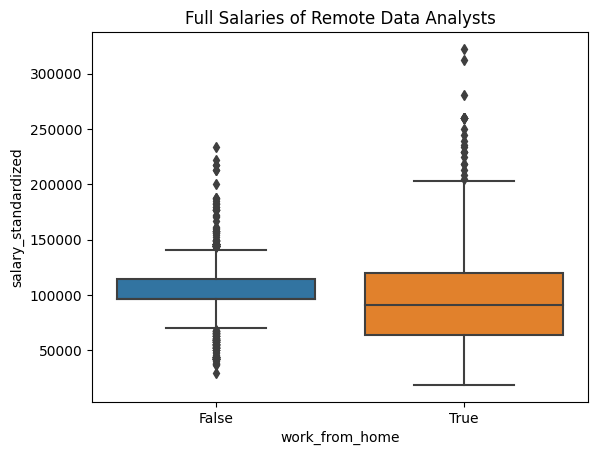

In [338]:
# Boxplot for remote data analysts

sns.boxplot(x = encoded_df["work_from_home"], 
y = encoded_df['salary_standardized']).set_title('Full Salaries of Remote Data Analysts')

plt.savefig("images/full_salary_remote_box.jpg")

Non-Remote Data Analyst Full Standardized Salaries
1. Histogram
2. Kolmogorov-Smirnov test for normality
3. Boxplot 

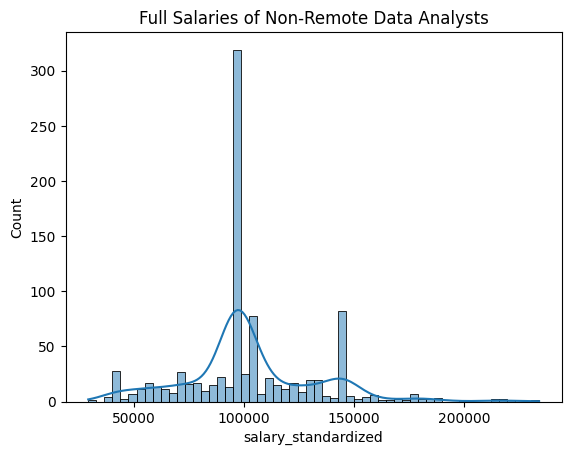

In [339]:
# Set ["work_from_home"] == False selects all False values 
# In this case, False is non-remote

non_remote = encoded_df[encoded_df["work_from_home"] == False] 

sns.histplot(data = non_remote, x = 'salary_standardized', 
kde = True).set(title = 'Full Salaries of Non-Remote Data Analysts')

plt.savefig("images/full_salary_non_remote_hist.jpg")

In [340]:
# kstest for non_remote positions

stats.kstest(
    encoded_df['work_from_home'], cdf = stats.norm.cdf, 
args = (encoded_df["work_from_home"].mean(), 
encoded_df["work_from_home"].std()))

KstestResult(statistic=0.3915017898314921, pvalue=3.686959327760675e-308, statistic_location=True, statistic_sign=-1)

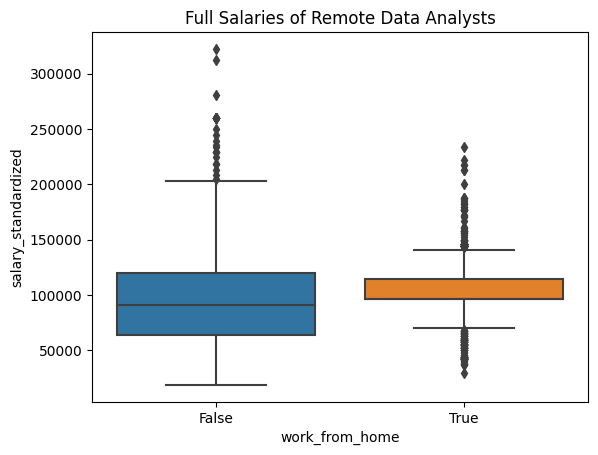

In [341]:
# Boxplot for non_remote positions

sns.boxplot(x = encoded_df["work_from_home"] == False, 
y = encoded_df['salary_standardized']).set_title('Full Salaries of Remote Data Analysts')

plt.savefig("images/full_salary_non_remote_box.jpg")


**SQL Full Standardized Salaries**
1. Histogram
2. Kolmogorov-Smirnov test for normality
3. Boxplot

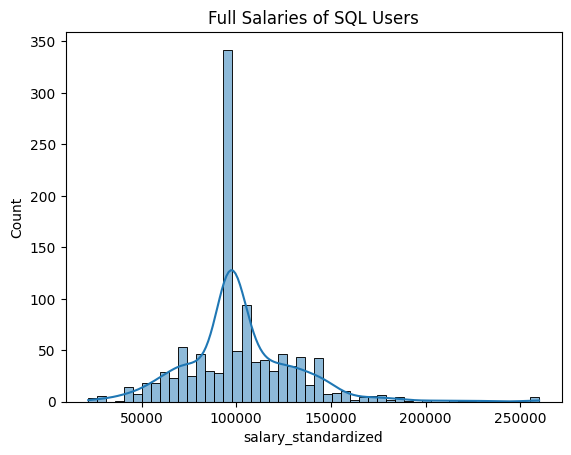

In [342]:
# Full standardized salaries for SQL users 

sns.histplot(encoded_df.loc[encoded_df['sql'] == 1, 'salary_standardized'], 
kde = True).set(title = 'Full Salaries of SQL Users')

plt.savefig("images/full_salary_sql_hist.jpg")

In [343]:
# kstest for SQL users

stats.kstest(
    encoded_df['sql'], cdf = stats.norm.cdf, 
args = (encoded_df["sql"].mean(), 
encoded_df["sql"].std()))

KstestResult(statistic=0.3461545525325499, pvalue=5.404652198421466e-239, statistic_location=1, statistic_sign=-1)

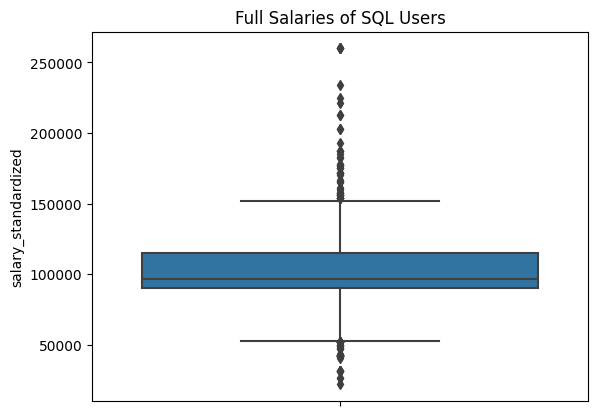

In [344]:
# Boxplot for SQL users

sns.boxplot(y = encoded_df.loc[encoded_df['sql'] == 1, 
'salary_standardized']).set(title = 'Full Salaries of SQL Users')

plt.savefig("images/full_salary_sql_box.jpg")


**Python Full Standardized Salaries**
1. Histogram
2. Kolmogorov-Smirnov test for normality
3. Boxplot

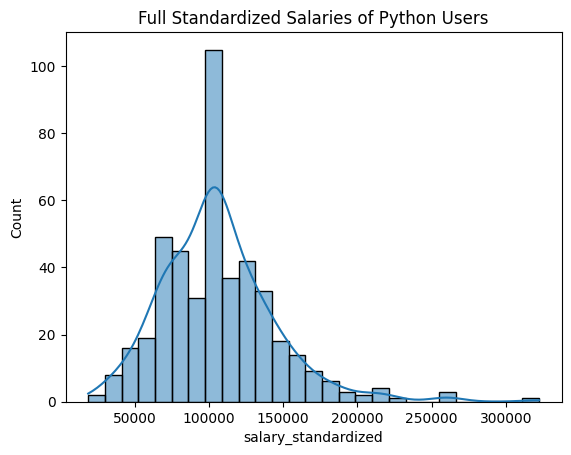

In [345]:
# Full standardized salaries of Python users

sns.histplot(encoded_df.loc[encoded_df['python'] == 1, 'salary_standardized'], 
kde = True).set(title = 'Full Standardized Salaries of Python Users')

plt.savefig("images/full_salary_python_hist.jpg")

In [346]:
# kstest for Python users

stats.kstest(
    encoded_df['python'], cdf = stats.norm.cdf, 
args = (encoded_df["python"].mean(), 
encoded_df["python"].std()))

KstestResult(statistic=0.49093777468243366, pvalue=0.0, statistic_location=0, statistic_sign=1)

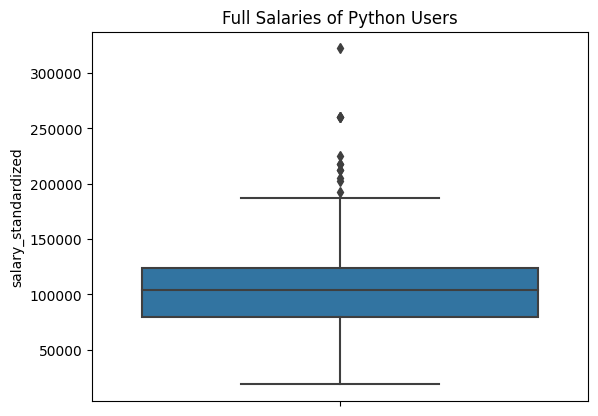

In [347]:
# Boxplot for Python users

sns.boxplot(y = encoded_df.loc[encoded_df['python'] == 1, 
'salary_standardized']).set(title = 'Full Salaries of Python Users')

plt.savefig("images/full_salary_python_box.jpg")

## Tableau Full Standardized Salaries
1. Histogram
2. Kolmogorov-Smirnov test for normality
3. Boxplot

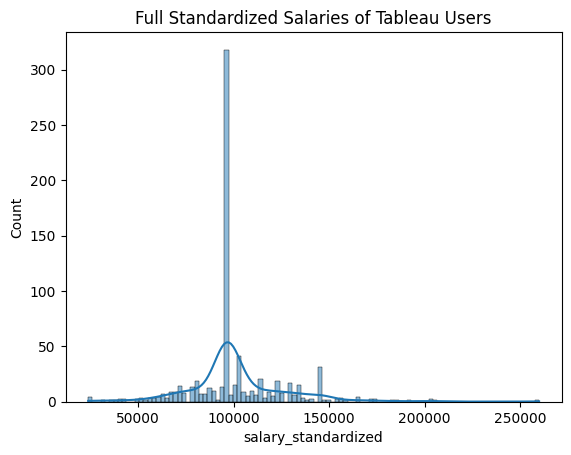

In [348]:
# Full standardized salaries of Tableau users

sns.histplot(encoded_df.loc[encoded_df['tableau'] == 1, 'salary_standardized'], 
kde = True).set(title = 'Full Standardized Salaries of Tableau Users')

plt.savefig("images/full_salary_tableau_hist.jpg")


In [349]:
# kstest for Tableau users

stats.kstest(
    encoded_df['tableau'], cdf = stats.norm.cdf, 
args = (encoded_df["tableau"].mean(), 
encoded_df["tableau"].std()))

KstestResult(statistic=0.42951295184962085, pvalue=0.0, statistic_location=0, statistic_sign=1)

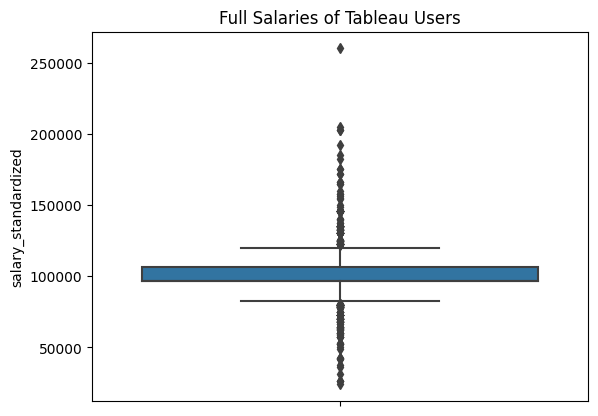

In [350]:
# Boxplot for Tableau users

sns.boxplot(y = encoded_df.loc[encoded_df['tableau'] == 1, 
'salary_standardized']).set(title = 'Full Salaries of Tableau Users')

plt.savefig("images/full_salary_tableau_box.jpg")

# Top companies for Data Analyst positions

Top 5 companies for Data Analyst positions in a barplot

Top 5 Skills for Data Analysts in a barplot

Top 10 Cities for Data Analyst Positions in a barplot

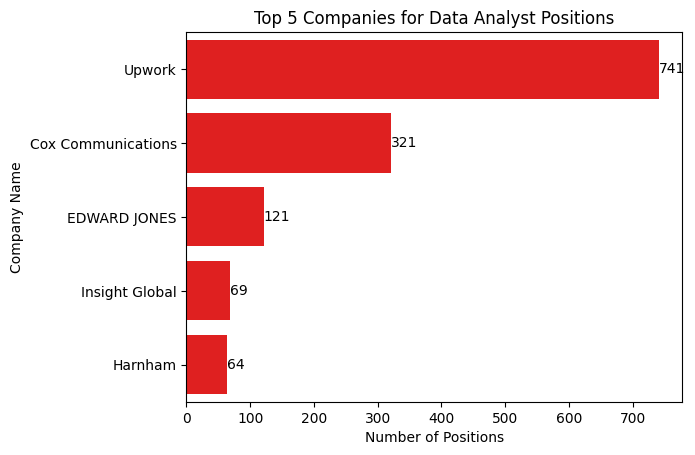

<Figure size 640x480 with 0 Axes>

In [351]:
# Create variable for top_companies

top_companies = encoded_df['company_name'].value_counts().nlargest(5)

ax = sns.barplot(x = top_companies.values, y = top_companies.index, color = 'red')


# Add bar labels on top of bars

for i in ax.containers:
    ax.bar_label(i,)

# Set plot title and axis labels

plt.title('Top 5 Companies for Data Analyst Positions')
plt.xlabel('Number of Positions')
plt.ylabel('Company Name')

# Display the plot

plt.show()

plt.savefig("images/top_5_companies_bar.jpg")

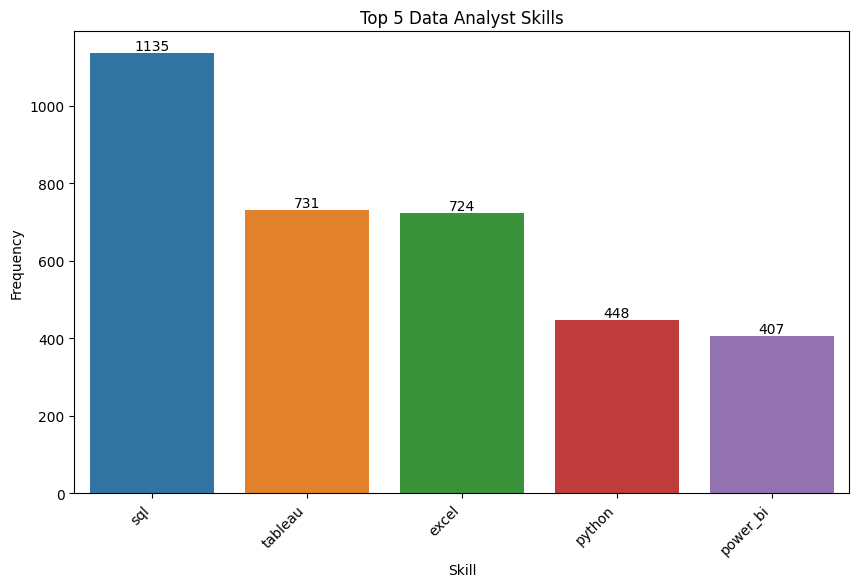

<Figure size 640x480 with 0 Axes>

In [352]:
# Top 5 Data Analyst Skills 

top_5_skills = encoded_df.loc[:,'airflow':'word'].sum().sort_values(ascending = False)[:5]

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = top_5_skills.index, y = top_5_skills.values)

# Add bar labels on top of bars

for i in ax.containers:
    ax.bar_label(i,)


# Add visualization labels

plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('Skill')
plt.ylabel('Frequency')
plt.title('Top 5 Data Analyst Skills')
plt.show()

plt.savefig("images/top_5_skills_bar.jpg")

[Text(0.5, 1.0, 'Full Salaries of Python Users')]

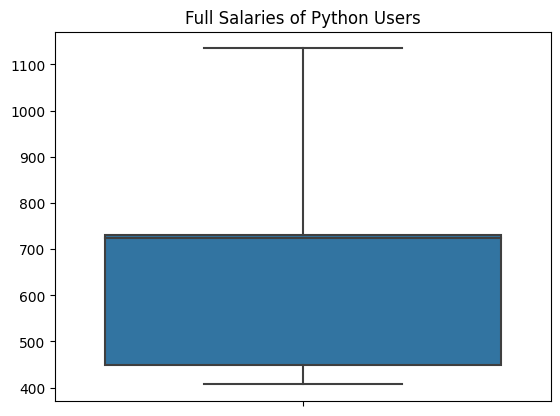

In [353]:

sns.boxplot(y = top_5_skills).set(title = 'Full Salaries of Python Users')

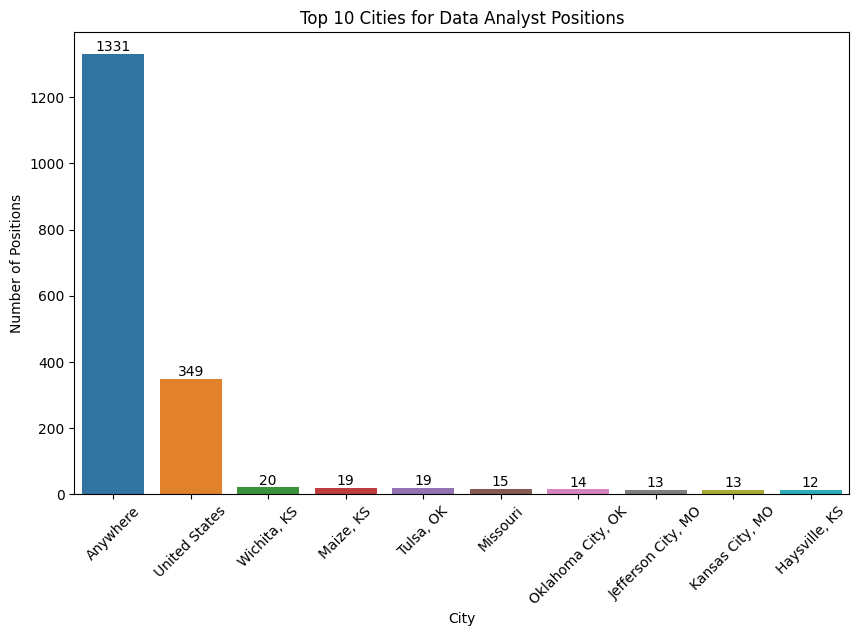

<Figure size 640x480 with 0 Axes>

In [354]:
# Top 10 cities for data analysts

top_cities = encoded_df['location'].value_counts().head(10)

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = top_cities.index, y = top_cities.values)

# Add bar labels on top of bars

for i in ax.containers:
    ax.bar_label(i,)
    
# Add labels

plt.title('Top 10 Cities for Data Analyst Positions')
plt.xlabel('City')
plt.ylabel('Number of Positions')
plt.xticks(rotation = 45)
plt.show()

plt.savefig("images/top_10_cities_bar.jpg")

[Text(0.5, 1.0, 'Full Salaries of Tableau Users')]

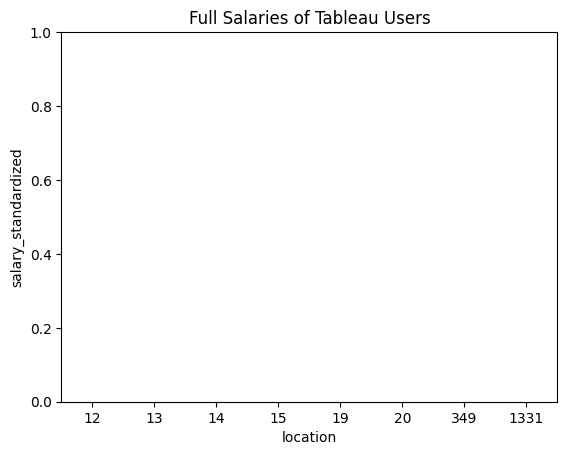

In [355]:
# Boxplot for location

sns.boxplot(x = encoded_df['location'].value_counts().head(10), y = 
encoded_df['salary_standardized']).set(title = 'Full Salaries of Tableau Users')

#plt.savefig("images/full_salary_tableau_box.jpg")